# Import library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

pd.options.display.max_columns = 100
pd.options.display.max_rows = 3000

# Loading data

In [3]:
df = pd.read_csv('../project_2/df_train_processed.csv')

In [4]:
df.head(2)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,...,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,...,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,...,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [5]:
df.shape

(2050, 108)

# Handle null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Columns: 108 entries, id to neighborhood_Veenker
dtypes: float64(11), int64(55), object(42)
memory usage: 1.7+ MB


In [7]:
df.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour',
       ...
       'neighborhood_NoRidge', 'neighborhood_NridgHt', 'neighborhood_OldTown',
       'neighborhood_SWISU', 'neighborhood_Sawyer', 'neighborhood_SawyerW',
       'neighborhood_Somerst', 'neighborhood_StoneBr', 'neighborhood_Timber',
       'neighborhood_Veenker'],
      dtype='object', length=108)

In [8]:
df.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
count,2050.000000,2.050000e+03,2050.000000,1720.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2028.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2049.000000,2049.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,1936.000000,2049.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.00000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.00000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000
mean,1474.098049,7.134975e+08,57.026829,69.037791,10067.220488,6.113171,5.561463,1971.721463,1984.206829,99.745069,442.300488,47.959024,567.728293,1057.987805,1164.619024,329.489756,5.515610,1499.624390,0.427526,0.063446,1.577561,0.371220,2.843902,1.042927,6.437073,0.591220,1978.724690,1.776964,473.535122,93.879512,47.580000,22.582927,2.592683,16.519512,2.399024,51.599512,6.220976,2007.775610,181519.686829,0.002927,0.009268,0.036585,0.013171,0.087805,0.034634,0.069756,0.056585,0.001463,0.000976,0.033659,0.000488,0.011707,0.040000,0.15122,0.008293,0.042439,0.023415,0.059512,0.079512,0.01561,0.054146,0.042439,0.063415,0.018537,0.023415,0.008293
std,844.181724,1.886914e+08,42.826865,23.256199,6743.517958,1.425855,1.104310,30.179906,21.027815,174.992265,461.204124,165.000901,444.954786,449.410704,396.499270,425.712712,51.081185,500.392368,0.522673,0.251705,0.549265,0.501098,0.826610,0.209839,1.559677,0.638539,25.436797,0.764531,216.145575,128.564062,66.755256,59.857633,25.235706,57.387043,37.791752,573.532756,2.744967,1.312325,79245.655820,0.054034,0.095848,0.187787,0.114033,0.283080,0.182896,0.254798,0.231105,0.038236,0.031227,0.180393,0.022086,0.107591,0.196007,0.35835,0.090708,0.201638,0.151253,0.236639,0.270603,0.12399,0.226361,0.201638,0.243767,0.134914,0.151253,0.090708
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,753.250000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,879.250000,0.000000,0.000000,1130.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,196

In [9]:
# Create a filter num_col to quickly see columns I care about for now

num_col = ['1st_flr_sf', '2nd_flr_sf', 'bsmtfin_sf_1',
           'bsmt_unf_sf', 'garage_area', 'gr_liv_area', 'lot_area',
           'neighborhood', 'open_porch_sf', 'overall_cond', 'overall_qual',
           'total_bsmt_sf', 'totrms_abvgrd', 'year_built']

In [10]:
# handle df_sub2 .isnull()
df[num_col].isnull().sum()

1st_flr_sf       0
2nd_flr_sf       0
bsmtfin_sf_1     0
bsmt_unf_sf      0
garage_area      0
gr_liv_area      0
lot_area         0
neighborhood     0
open_porch_sf    0
overall_cond     0
overall_qual     0
total_bsmt_sf    0
totrms_abvgrd    0
year_built       0
dtype: int64

# Clean-up and EDA

In [26]:
df.corr()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
id,1.000000,0.175914,0.026482,-0.024862,0.032829,-0.061629,-0.026007,-0.064521,-0.090223,-0.035539,-0.045878,0.000723,0.008555,-0.038346,-0.022704,-0.008448,0.011711,-0.023982,-0.033385,0.014381,-0.059182,-0.042116,0.010530,-0.002415,-0.009217,-0.037639,-0.050850,-0.048756,-0.046183,-0.009102,0.001328,0.033720,-0.022799,0.009736,0.055691,-0.012690,0.127682,-0.975747,-0.051518,-0.027867,-0.029343,-0.008948,0.021437,0.094970,0.074033,0.056390,-0.070505,0.011018,0.040763,0.065273,0.034419,0.064011,0.043331,-0.035440,-0.064791,-0.046157,-0.012937,-0.079593,-0.001718,0.029668,0.015202,-0.074461,-0.052422,-0.012113,0.033774,0.015343
pid,0.175914,1.000000,-0.003210,-0.092108,0.024443,-0.265344,0.106293,-0.346768,-0.176026,-0.247759,-0.086522,-0.013144,-0.111281,-0.203795,-0.145582,-0.005220,0.072339,-0.112412,-0.030554,-0.001946,-0.178947,-0.163674,0.009628,0.068534,-0.084304,-0.120311,-0.250743,-0.227983,-0.201367,-0.040878,-0.080810,0.150406,-0.024634,-0.041900,0.005857,0.004268,-0.032352,0.008395,-0.254584,0.056279,-0.095389,0.140139,0.117480,0.318376,0.196833,0.281080,-0.241134,-0.036578,0.033587,0.192200,0.022687,0.121004,0.223899,-0.401854,-0.090183,-0.204597,-0.151316,-0.247161,0.196120,0.130153,0.076931,-0.030116,-0.252574,-0.135723,0.167027,-0.087450
ms_subclass,0.026482,-0.003210,1.000000,-0.389420,-0.245809,0.035164,-0.069634,0.035636,0.044187,-0.004292,-0.060854,-0.068265,-0.139911,-0.226038,-0.246570,0.305545,0.031051,0.067738,0.025055,-0.017249,0.141708,0.179148,-0.003949,0.252073,0.033858,-0.055530,0.084431,-0.049598,-0.108842,0.001314,-0.020596,-0.040010,-0.030137,-0.038949,-0.004613,-0.027528,0.012690,-0.032804,-0.087933,0.113429,0.232614,-0.031981,-0.009966,-0.112107,0.015957,-0.007372,0.005172,0.056305,0.045962,0.013275,0.053130,0.263876,-0.008209,-0.175644,0.179721,-0.069872,-0.008837,0.010726,0.027357,0.044129,-0.081806,-0.000923,0.106891,0.094009,-0.081165,0.008862
lot_frontage,-0.024862,-0.092108,-0.389420,1.000000,0.574945,0.196105,-0.055486,0.110169,0.086349,0.218762,0.214178,0.036740,0.127605,0.356584,0.464663,0.014291,-0.000217,0.385080,0.111441,-0.030858,0.153713,0.036405,0.221342,0.016018,0.364287,0.254303,0.068888,0.298077,0.359806,0.115799,0.185598,-0.003017,0.031944,0.075071,0.156700,0.051764,-0.016796,0.008991,0.343077,-0.105282,-0.216936,-0.116936,0.084587,0.023138,0.001837,-0.025812,0.028010,-0.052207,NaN,-0.060434,NaN,-0.201931,0.054887,0.112975,-0.172603,0.095839,0.121171,0.202355,-0.084998,-0.062063,0.033351,0.013368,-0.058739,-0.054843,0.060948,-0.004473
lot_area,0.032829,0.024443,-0.245809,0.574945,1.000000,0.105448,-0.018806,0.035757,0.050323,0.169237,0.215430,0.041717,0.041184,0.277175,0.381469,0.029174,0.001241,0.327213,0.116128,0.029980,0.125333,0.049785,0.138803,-0.013547,0.238422,0.289277,0.004473,0.214724,0.262953,0.155439,0.140681,0.014028,0.019524,0.067635,0.115094,0.093903,0.002957,-0.029406,0.296328,-0.061538,-0.118632,-0.087739,0.316513,0.007366,0.044966,0.016103,0.039082,-0.035152,-0

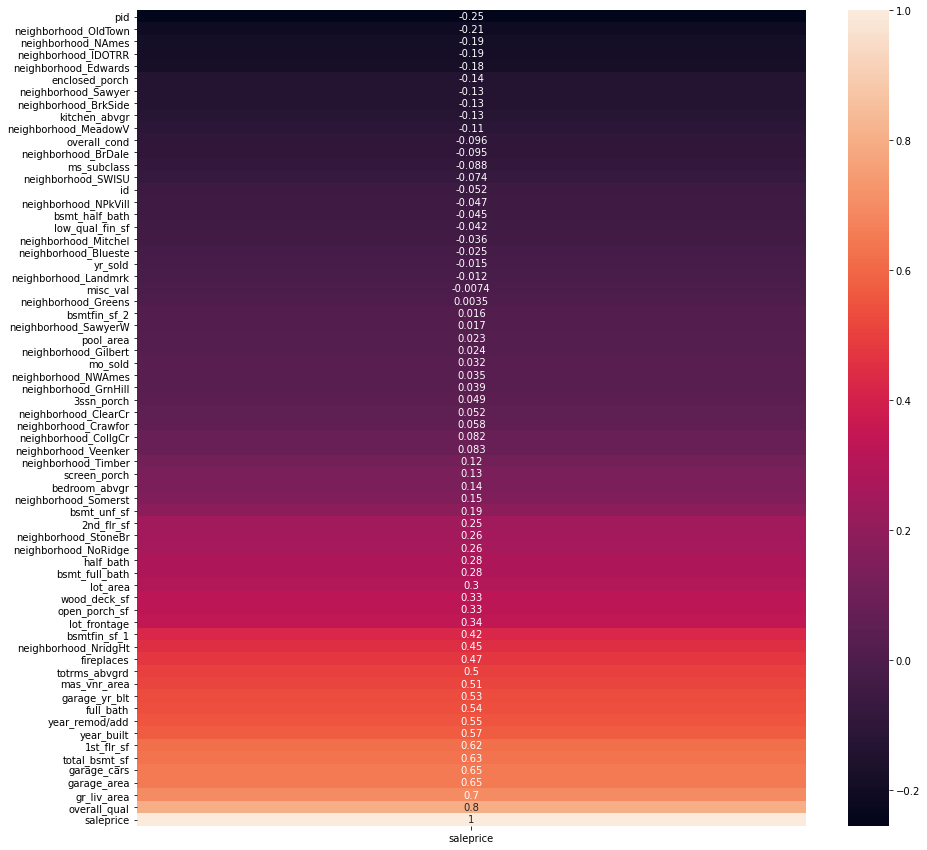

In [31]:
# sns.heatmap(df.corr()[['bpm']].sort_values('bpm'), annot = True)
plt.figure(figsize = (15, 15))

sns.heatmap(df.corr()[['saleprice']].sort_values('saleprice'), annot = True);

- Should I drop df['garage_yr_blt'] == 0?
- drop df['mas_vnr_area'].isnull()? x22

In [77]:
df['bsmt_full_bath'] = df['bsmt_full_bath'].fillna(0)

In [78]:
df['bsmt_full_bath'].isnull().sum()

0

In [79]:
df['bsmt_full_bath'].describe()

count    2050.000000
mean        0.427317
std         0.522631
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: bsmt_full_bath, dtype: float64

In [80]:
df['bsmt_full_bath'].value_counts()

0.0    1201
1.0     824
2.0      23
3.0       2
Name: bsmt_full_bath, dtype: int64

In [143]:
df.to_csv('df_train_sub3', index = False)

# Define Feature Matrix & Target

In [ ]:
list(df[num_col].columns)

In [112]:
features = ['1st_flr_sf', '2nd_flr_sf', 'bsmtfin_sf_1', 'garage_area', 'gr_liv_area','lot_area',
            'open_porch_sf','overall_qual', 'total_bsmt_sf', 'year_remod/add', 'full_bath', 'fireplaces',
            'wood_deck_sf', 'bsmt_full_bath', 'totrms_abvgrd', 'year_built', 'neighborhood_NoRidge', 'neighborhood_NridgHt',
            'neighborhood_StoneBr']

In [113]:
y = df['saleprice']
X = df[features]

#### Train-Test-Split

In [114]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 308)

#### Instantiate, Fit, Score Model

In [115]:
lr = LinearRegression()

In [116]:
lr.fit(X_train, y_train)

LinearRegression()

In [117]:
cross_val_score(lr, X_train, y_train)

array([0.83626455, 0.84838034, 0.87955224, 0.89049664, 0.73434761])

In [118]:
cross_val_score(lr, X_train, y_train).mean()

0.8378082751359128

In [119]:
lr.score(X_train, y_train)

0.8504588107943645

In [120]:
cross_val_score(lr, X_valid, y_valid)

array([0.73207436, 0.34509408, 0.81503747, 0.81925265, 0.86515681])

In [121]:
cross_val_score(lr, X_valid, y_valid).mean()

0.7153230753799529

In [122]:
lr.score(X_valid, y_valid)

0.7905855716523637

In [123]:
lr.score(X_train, y_train), lr.score(X_valid, y_valid)

(0.8504588107943645, 0.7905855716523637)

In [124]:
list(zip(X.columns, lr.coef_))

[('1st_flr_sf', 45.20162646171041),
 ('2nd_flr_sf', 41.712464924068925),
 ('bsmtfin_sf_1', 18.65961961874254),
 ('garage_area', 34.16750704511873),
 ('gr_liv_area', -1.0882061562050311),
 ('lot_area', 0.7701290139770015),
 ('open_porch_sf', -1.0176752080565943),
 ('overall_qual', 16210.612198829152),
 ('total_bsmt_sf', 11.468542361421697),
 ('year_remod/add', 350.0976472407984),
 ('full_bath', -2535.799539005284),
 ('fireplaces', 8116.920707801785),
 ('wood_deck_sf', 9.442106680236607),
 ('bsmt_full_bath', 4893.895740695033),
 ('totrms_abvgrd', 571.5371467876091),
 ('year_built', 237.31802651324006),
 ('neighborhood_NoRidge', 37876.97709849303),
 ('neighborhood_NridgHt', 43291.02593046243),
 ('neighborhood_StoneBr', 55852.49088903678)]

#### Now we have a model object, and we can run our df_test data through it

# Prep df_test data

In [125]:
df_test = pd.read_csv('../project_2/df_test_process.csv')

In [126]:
df_test.shape

(878, 108)

In [127]:
df_test.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,neighborhood_GrnHill,neighborhood_Landmrk,y_hat
count,878.000000,8.780000e+02,878.000000,718.000000,878.000000,878.000000,878.000000,878.000000,878.000000,877.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,833.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.00000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.0,878.0,878.000000
mean,1444.749431,7.162867e+08,58.268793,69.545961,10307.033030,6.050114,5.566059,1970.492027,1984.417995,106.236032,441.328018,53.896355,539.133257,1034.357631,1145.787016,348.398633,2.728929,1496.914579,0.439636,0.055809,1.539863,0.398633,2.879271,1.047836,6.454442,0.618451,1976.759904,1.742597,470.362187,93.430524,47.070615,24.064920,2.597950,14.830296,1.884966,48.498861,6.202733,2007.825740,0.004556,0.012528,0.036446,0.019362,0.099089,0.036446,0.056948,0.055809,0.005695,0.027335,0.014806,0.036446,0.151481,0.006834,0.050114,0.026196,0.050114,0.08656,0.018223,0.045558,0.043280,0.059226,0.014806,0.027335,0.007973,0.0,0.0,178737.770355
std,850.838263,1.889103e+08,42.235407,23.533945,10002.674602,1.369065,1.128903,30.395895,20.450725,187.158908,438.457329,178.632355,426.172161,413.446291,375.264111,432.985566,32.572548,506.468967,0.529948,0.229683,0.559060,0.505927,0.830712,0.223966,1.596632,0.669571,25.689763,0.750391,212.734075,121.181702,68.180939,73.249463,24.962482,53.003794,29.916672,550.169317,2.642498,1.327861,0.067381,0.111291,0.187505,0.137873,0.298952,0.187505,0.231875,0.229683,0.075291,0.163150,0.120846,0.187505,0.358721,0.082430,0.218304,0.159809,0.218304,0.28135,0.133834,0.208644,0.203603,0.236181,0.120846,0.163150,0.088984,0.0,0.0,70856.332341
min,2.000000,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,11245.760851
25%,692.250000,5.284841e+08,20.000000,59.000000,7297.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,216.000000,789.000000,864.000000,0.000000,0.000000,1114.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,322.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,20

#### Make sure there aren't any nulls in the columns we used in the model:

In [128]:
df_test[features].isnull().sum()

1st_flr_sf              0
2nd_flr_sf              0
bsmtfin_sf_1            0
garage_area             0
gr_liv_area             0
lot_area                0
open_porch_sf           0
overall_qual            0
total_bsmt_sf           0
year_remod/add          0
full_bath               0
fireplaces              0
wood_deck_sf            0
bsmt_full_bath          0
totrms_abvgrd           0
year_built              0
neighborhood_NoRidge    0
neighborhood_NridgHt    0
neighborhood_StoneBr    0
dtype: int64

In [106]:
list(df_test.columns)

['id',
 'pid',
 'ms_subclass',
 'ms_zoning',
 'lot_frontage',
 'lot_area',
 'street',
 'alley',
 'lot_shape',
 'land_contour',
 'utilities',
 'lot_config',
 'land_slope',
 'neighborhood',
 'condition_1',
 'condition_2',
 'bldg_type',
 'house_style',
 'overall_qual',
 'overall_cond',
 'year_built',
 'year_remod/add',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'mas_vnr_area',
 'exter_qual',
 'exter_cond',
 'foundation',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_sf_1',
 'bsmtfin_type_2',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 'heating',
 'heating_qc',
 'central_air',
 'electrical',
 '1st_flr_sf',
 '2nd_flr_sf',
 'low_qual_fin_sf',
 'gr_liv_area',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'kitchen_qual',
 'totrms_abvgrd',
 'functional',
 'fireplaces',
 'fireplace_qu',
 'garage_type',
 'garage_yr_blt',
 'garage_finish',
 'garage_cars',
 'garage_are

In [144]:
df_test.to_csv('df_test_sub3', index = False)

In [129]:
features

['1st_flr_sf',
 '2nd_flr_sf',
 'bsmtfin_sf_1',
 'garage_area',
 'gr_liv_area',
 'lot_area',
 'open_porch_sf',
 'overall_qual',
 'total_bsmt_sf',
 'year_remod/add',
 'full_bath',
 'fireplaces',
 'wood_deck_sf',
 'bsmt_full_bath',
 'totrms_abvgrd',
 'year_built',
 'neighborhood_NoRidge',
 'neighborhood_NridgHt',
 'neighborhood_StoneBr']

In [130]:
X_TEST = df_test[features]

#### Create Predictions

In [132]:
df_test['y_hat'] = lr.predict(X_TEST)

In [133]:
df_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,...,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,neighborhood_GrnHill,neighborhood_Landmrk,y_hat
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,...,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,147054.488256
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,...,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,179758.571954
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,...,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,211894.018048
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,...,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,115346.567219
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,...,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184575.678751


In [134]:
df_test.shape

(878, 108)

# Create Submission

In [136]:
nars_submission = df_test[['id', 'y_hat']]

# View Correct Submission Format

In [137]:
nars_submission.head()

,id,y_hat
0,2658,147054.488256
1,2718,179758.571954
2,2414,211894.018048
3,1989,115346.567219
4,625,184575.678751


In [138]:
nars_submission.shape

(878, 2)

# Rename columns of the fisrt submission

In [139]:
nars_submission.rename(columns = {'id' : 'Id',
                                     'y_hat' : 'SalePrice'}, inplace = True)

/Users/narschang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [140]:
nars_submission.shape

(878, 2)

In [141]:
nars_submission.head()

,Id,SalePrice
0,2658,147054.488256
1,2718,179758.571954
2,2414,211894.018048
3,1989,115346.567219
4,625,184575.678751


#### Export as a CSV

In [142]:
nars_submission.to_csv('nars_submission_3.csv', index = False)

# Sample submission reference

sample_submission = pd.read_csv('sample_sub_reg.csv')
sample_submission.shape

sample_submission.head()

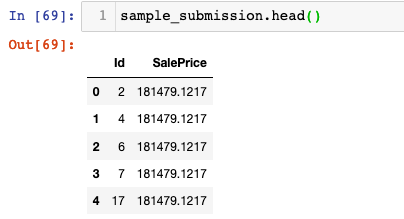